In [1]:
print("Implement ANN training process using forward and backward propagation")

Implement ANN training process using forward and backward propagation


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
np.random.seed(42)
X = np.random.rand(1000, 5)
Y = np.random.randint(0, 3, 1000)

In [4]:
# Normalizing Input data
X = X / np.max(X)

In [5]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# convert target to categorical format 
Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)

In [9]:
# Dening the model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

c:\Users\athar\CODE\Programs\TE-Sem-VI\ANN\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compile the model with an adaptive learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
# train model and store training history
history = model.fit(X_train, Y_train, epochs=200, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3335 - loss: 1.1040 - val_accuracy: 0.3750 - val_loss: 1.1007
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3297 - loss: 1.1032 - val_accuracy: 0.2900 - val_loss: 1.0979
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3628 - loss: 1.0984 - val_accuracy: 0.3600 - val_loss: 1.0983
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3757 - loss: 1.0943 - val_accuracy: 0.3050 - val_loss: 1.1146
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3840 - loss: 1.0913 - val_accuracy: 0.3250 - val_loss: 1.0988
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3319 - loss: 1.1012 - val_accuracy: 0.3350 - val_loss: 1.0971
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3299 - loss: 1.0980 - val_accuracy: 0.3300 - val_loss: 1.0978
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3319 - loss: 1.0949 - val_accuracy: 0.3750 - 

In [13]:
# evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3348 - loss: 1.9971 
Test Accuracy: 30.000001192092896%


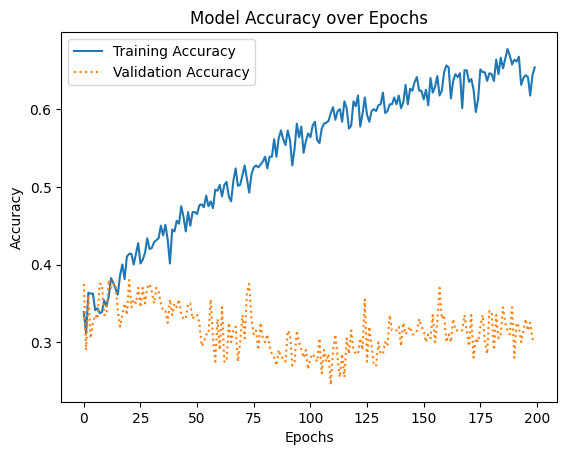

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',linestyle='dotted')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_true = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(Y_true, Y_pred)
conf_matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[25, 26, 13],
       [38, 19, 18],
       [21, 24, 16]])